# Carga de Librerías

In [424]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.linear_model import LinearRegression
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC, LinearSVR

# Lectura de Base de Datos

In [425]:
Base = pd.read_csv("F:\\P\\Examen\\BaseFinalRegresion.csv",dtype='str',encoding = "ISO-8859-1")
B=Base[Base.columns[1:7]]

In [426]:
B["date"] = pd.to_datetime(B["date"],dayfirst=True)
B["close"] = B["close"].astype(float)
B["high"] = B["high"].astype(float)
B["low"] = B["low"].astype(float)
B["open"] = B["open"].astype(float)
B["volume"] = B["volume"].astype(int)
B.head()

,date,close,high,low,open,volume
0,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733
1,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309
2,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
3,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
4,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453


In [427]:
B.shape

(1258, 6)

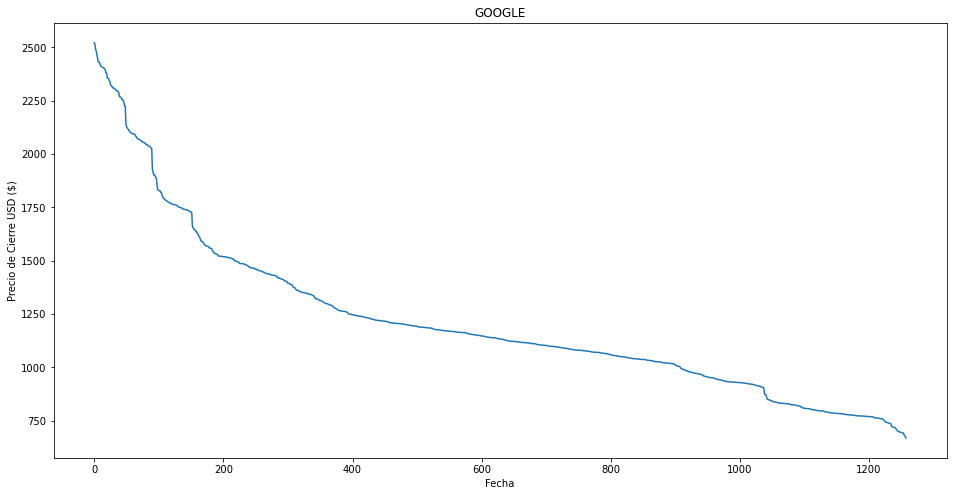

In [428]:
plt.figure(figsize=(16,8))
plt.title('GOOGLE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre USD ($)')
plt.plot(B['close'])
plt.show()

# Definición de datos a predecir

In [429]:
df= B[['close']]

In [430]:
pronosticos = 25
df['prediccion'] = df[['close']].shift(-pronosticos)
df.tail(27)

,close,prediccion
1231,738.42,675.22
1232,736.96,668.26
1233,736.08,NaN
1234,733.78,NaN
1235,720.95,NaN
1236,720.64,NaN
1237,719.85,NaN
1238,718.92,NaN
1239,718.27,NaN
1240,716.98,NaN


# Definición de Variables Independiente y Dependiente

In [431]:
X = np.array(df.drop(['prediccion'],1))[:-pronosticos]
print(X)

[[2521.6 ]
 [2513.93]
 [2491.4 ]
 ...
 [ 738.63]
 [ 738.42]
 [ 736.96]]


In [432]:
y = np.array(df['prediccion'])[:-pronosticos]
print(y)

[2326.74 2321.41 2316.16 ...  680.04  675.22  668.26]


# Entrenamiento

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Regresiones

In [434]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
lr = LinearRegression().fit(X_train,y_train)
redneu = MLPRegressor().fit(X_train,y_train)
svm =  LinearSVR().fit(X_train,y_train)

# Separación de Base de Datos a Predecir

In [435]:
X_futura = df.drop(['prediccion'],1)[:-pronosticos]
X_futura = X_futura.tail(pronosticos)
X_futura = np.array(X_futura)
X_futura 

array([[764.48],
       [762.56],
       [762.52],
       [762.49],
       [762.13],
       [762.02],
       [761.68],
       [760.99],
       [760.54],
       [759.69],
       [759.66],
       [759.11],
       [758.49],
       [758.04],
       [754.02],
       [750.5 ],
       [747.92],
       [745.91],
       [742.74],
       [741.77],
       [741.19],
       [739.77],
       [738.63],
       [738.42],
       [736.96]])

# Predicciones

In [436]:
tree_prediccion = tree.predict(X_futura)
print(tree_prediccion)
print()

[733.78 733.78 720.95 720.64 719.85 719.85 718.27 716.98 715.09 710.36
 710.36 701.87 697.77 697.77 695.94 695.94 694.49 694.49 693.71 692.1
 692.1  680.04 680.04 675.22 668.26]



In [437]:
lr_prediccion = lr.predict(X_futura)
print(lr_prediccion)
print()

[773.25094801 771.51369933 771.47750665 771.45036214 771.12462801
 771.02509814 770.71746035 770.09313661 769.68596895 768.91687448
 768.88972997 768.39208061 767.83109405 767.4239264  763.78656197
 760.60160606 758.26717814 756.44849593 753.58022597 752.70255346
 752.17775959 750.89291942 749.86142801 749.67141644 748.35038359]



In [438]:
redneu_prediccion = RedNeu.predict(X_futura)
print(redneu_prediccion)
print()

[737.91595005 736.06448918 736.02591708 735.996988   735.64983909
 735.54376581 735.21590295 734.5505342  734.11659806 733.2969409
 733.26801183 732.73764543 732.13977786 731.70584172 727.82934553
 724.4350006  721.94710006 720.00885197 716.95201293 716.01663947
 715.457344   714.0880344  712.98872951 712.78622598 711.37834427]



In [439]:
svm_prediccion = RedNeu.predict(X_futura)
print(svm_prediccion)
print()

[737.91595005 736.06448918 736.02591708 735.996988   735.64983909
 735.54376581 735.21590295 734.5505342  734.11659806 733.2969409
 733.26801183 732.73764543 732.13977786 731.70584172 727.82934553
 724.4350006  721.94710006 720.00885197 716.95201293 716.01663947
 715.457344   714.0880344  712.98872951 712.78622598 711.37834427]



# Gráficas

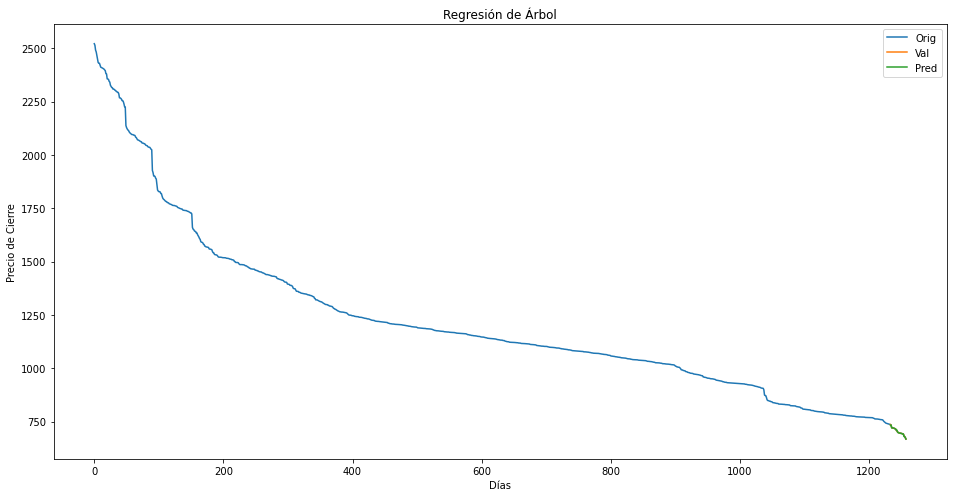

In [449]:
predicciones = tree_prediccion

valid =df[X.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión de Árbol')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(df['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

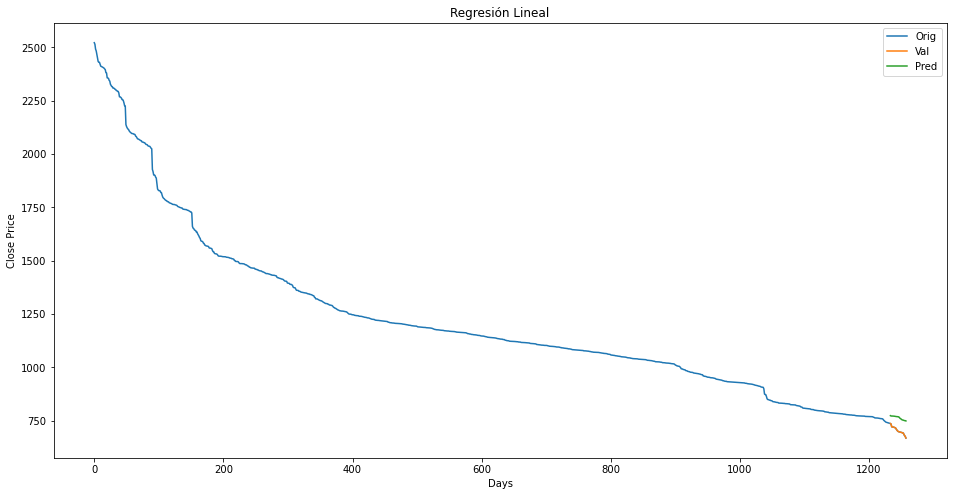

In [450]:
predictions = lr_prediction

valid =df[XX.shape[0]:]
valid ['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Regresión Lineal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['close'])
plt.plot(valid[['close','predictions']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

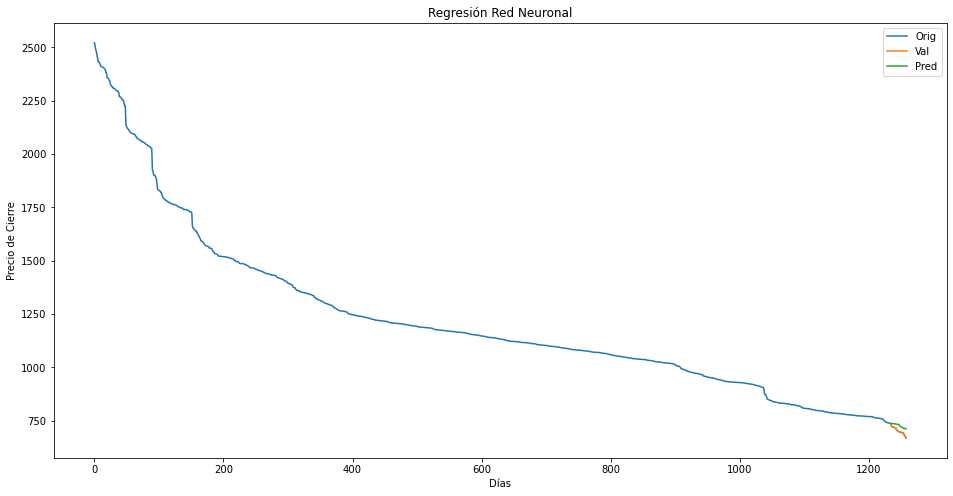

In [451]:
predicciones = redneu_prediccion

valid =df[XX.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión Red Neuronal')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(df['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

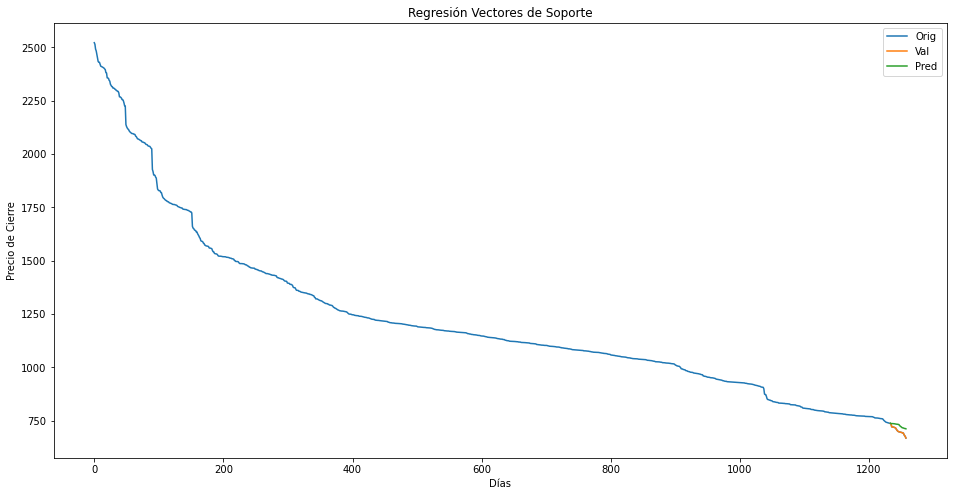

In [452]:
predicciones = svm_prediccion

valid =B[X.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión Vectores de Soporte')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(B['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

In [453]:
#Con base en las gráficas la mejor regresión para esta base se logra con la Regresión de Árbol-